In [16]:
import os 
import numpy as np
import math as m
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pathlib import Path
from PyPDF2 import PdfFileMerger
from PyPDF2 import PdfFileReader

def read_file(arx):
    
    with open(arx, 'r') as f:
        f1 = f.readlines()
        data = np.loadtxt(f1)
        
        f.close()
        
    return data


In [39]:
Sf = [2,4,8,10,16]
lenr = 100
lenphi = 100
lenz = 34

if lenphi == 800 :
        
    t_turb = 8.5
    lent = 26
    t_final = 12.5
        
elif lenphi == 100 :
    
    t_turb = 4
    lent = 61
    t_final = 6
        
elif lenphi == 240 : 
        
    t_turb = 8.5
    lent = 61
    t_final = 30
        
elif lenphi == 400 :
        
    t_turb = 8.5
    lent = 18
    t_final = 8.5

r_tauT = np.zeros((5,lent))
r_tauS = np.zeros((5,lent))
r_tauM = np.zeros((5,lent))

c_tauT = np.zeros((5,lent))
c_tauS = np.zeros((5,lent))
c_tauM = np.zeros((5,lent))



for i in range(0,5):
    
    pathpearson = 'Sf_'+str(Sf[i])+'/'+str(lenr)+'_'+str(lenphi)+'_'+str(lenz)+'/pearson_coeff/pearson.txt'
    pathcbest ='Sf_'+str(Sf[i])+'/'+str(lenr)+'_'+str(lenphi)+'_'+str(lenz)+'/c_best/c_best.txt'
    
    datapearson = read_file(pathpearson)
    datacbest = read_file(pathcbest)
    
    r_tauT[i,:] = datapearson[:,0]
    r_tauS[i,:] = datapearson[:,1]
    r_tauM[i,:] = datapearson[:,2]
    
    c_tauT[i,:] = datacbest[:,0]
    c_tauS[i,:] = datacbest[:,1]
    c_tauM[i,:] = datacbest[:,2]
    

[Errno 17] File exists: '/Users/miquelmiravet/Documents/University/DOCTORADO 2020-21/sub-grid models/Comparison_Sf/100_100_34'


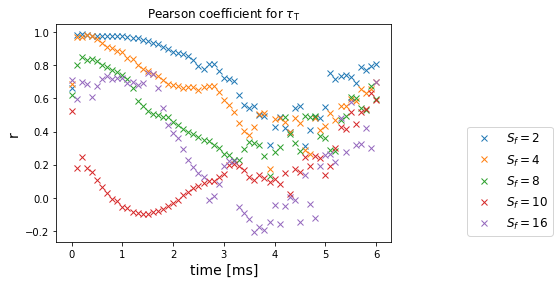

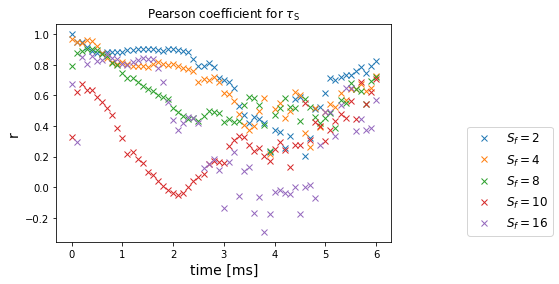

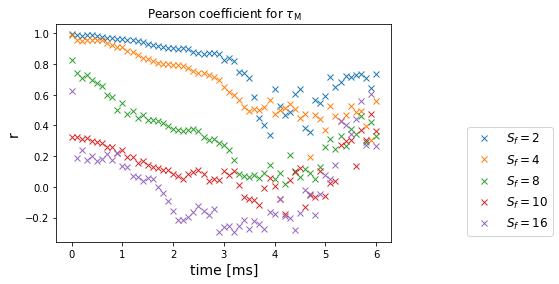

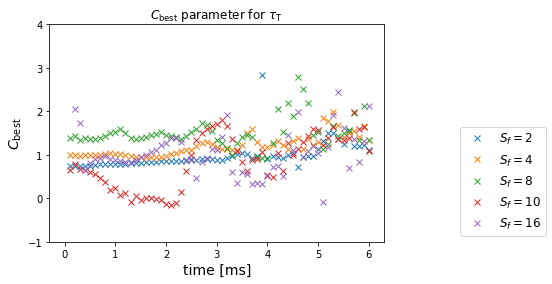

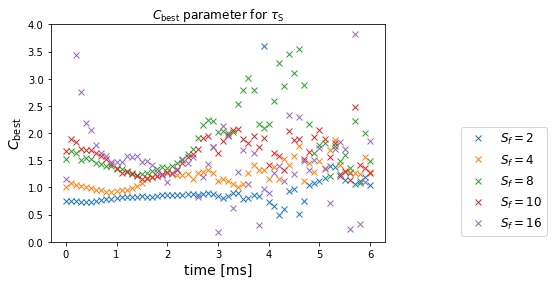

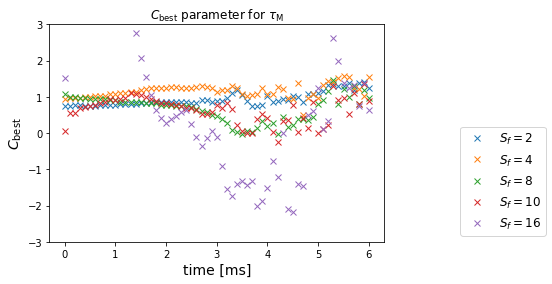

In [43]:
path = str(os.getcwd())+'/Comparison_Sf/'+str(lenr)+'_'+str(lenphi)+'_'+str(lenz)

try:
    os.mkdir(path)
except OSError as error:
    print(error)
    
    
t = np.linspace(0,t_final,lent)

#t = np.delete(t,0)
    
#r_tauT = np.delete(r_tauT,0, axis = 1)
#r_tauS = np.delete(r_tauS,0, axis = 1)
#r_tauM = np.delete(r_tauM,0, axis = 1)
    
#c_tauT = np.delete(c_tauT,0, axis = 1)
#c_tauS = np.delete(c_tauS,0, axis = 1)
#c_tauM = np.delete(c_tauM,0, axis = 1)
    
fig, ax = plt.subplots()

for i in range(0,5):
    
    ax.plot(t,r_tauT[i,:], linestyle='None', marker='x', label = r'$S_f = $'+str(Sf[i]))

ax.set_title(r'Pearson coefficient for $\tau_{\rm T}$')
ax.set_xlabel('time [ms]', fontsize = '14')
ax.set_ylabel('r', fontsize = '14')
leg = ax.legend( bbox_to_anchor=(1.5,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/r_tauT.pdf',bbox_inches = 'tight')
fig.show()

fig, ax = plt.subplots()

for i in range(0,5):
    
    ax.plot(t,r_tauS[i,:], linestyle='None', marker='x', label = r'$S_f = $'+str(Sf[i]))

ax.set_title(r'Pearson coefficient for $\tau_{\rm S}$')
ax.set_xlabel('time [ms]', fontsize = '14')
ax.set_ylabel('r', fontsize = '14')
leg = ax.legend( bbox_to_anchor=(1.5,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/r_tauS.pdf',bbox_inches = 'tight')
fig.show()

fig, ax = plt.subplots()

for i in range(0,5):
    
    ax.plot(t,r_tauM[i,:], linestyle='None', marker='x', label = r'$S_f = $'+str(Sf[i]))

ax.set_title(r'Pearson coefficient for $\tau_{\rm M}$')
ax.set_xlabel('time [ms]', fontsize = '14')
ax.set_ylabel('r', fontsize = '14')
leg = ax.legend( bbox_to_anchor=(1.5,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/r_tauM.pdf',bbox_inches = 'tight')
fig.show()

fig, ax = plt.subplots()

for i in range(0,5):
    
    ax.plot(t,c_tauT[i,:], linestyle='None', marker='x', label = r'$S_f = $'+str(Sf[i]))

ax.set_title(r'$C_{\rm best}$ parameter for $\tau_{\rm T}$')
ax.set_xlabel('time [ms]', fontsize = '14')
ax.set_ylabel(r'$C_{\rm best}$', fontsize = '14')
ax.set_ylim([-1,4])
leg = ax.legend( bbox_to_anchor=(1.5,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/cbest_tauT.pdf',bbox_inches = 'tight')
fig.show()

fig, ax = plt.subplots()

for i in range(0,5):
    
    ax.plot(t,c_tauS[i,:], linestyle='None', marker='x', label = r'$S_f = $'+str(Sf[i]))

ax.set_title(r'$C_{\rm best}$ parameter for $\tau_{\rm S}$')
ax.set_xlabel('time [ms]', fontsize = '14')
ax.set_ylabel(r'$C_{\rm best}$', fontsize = '14')
ax.set_ylim([0,4])
leg = ax.legend( bbox_to_anchor=(1.5,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/cbest_tauS.pdf',bbox_inches = 'tight')
fig.show()

fig, ax = plt.subplots()

for i in range(0,5):
    
    ax.plot(t,c_tauM[i,:], linestyle='None', marker='x', label = r'$S_f = $'+str(Sf[i]))

ax.set_title(r'$C_{\rm best}$ parameter for $\tau_{\rm M}$')
ax.set_xlabel('time [ms]', fontsize = '14')
ax.set_ylabel(r'$C_{\rm best}$', fontsize = '14')
ax.set_ylim([-3,3])
leg = ax.legend( bbox_to_anchor=(1.5,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/cbest_tauM.pdf',bbox_inches = 'tight')
fig.show()

#merge into one file
pdf_mer = PdfFileMerger()
fig1 = PdfFileReader(path+'/r_tauT.pdf','rb')
fig2 = PdfFileReader(path+'/r_tauS.pdf','rb')
fig3 = PdfFileReader(path+'/r_tauM.pdf','rb')
fig4 = PdfFileReader(path+'/cbest_tauT.pdf','rb')
fig5 = PdfFileReader(path+'/cbest_tauS.pdf','rb')
fig6 = PdfFileReader(path+'/cbest_tauM.pdf','rb')

pdf_mer.append(fig1)
pdf_mer.append(fig2)
pdf_mer.append(fig3)
pdf_mer.append(fig4)
pdf_mer.append(fig5)
pdf_mer.append(fig6)

with Path(path+'/all_plots.pdf').open(mode='wb') as output_file:
    pdf_mer.write(output_file)

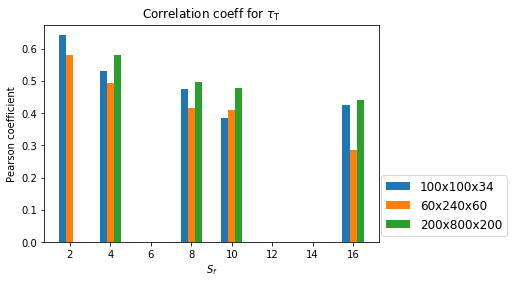

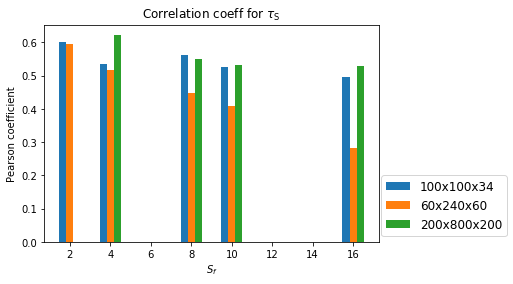

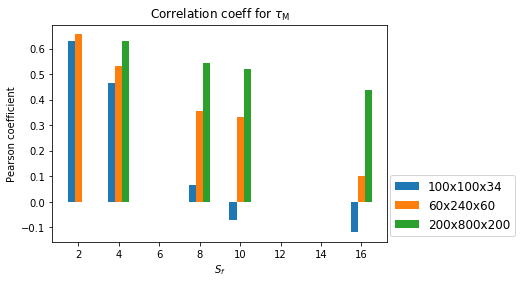

In [45]:
#for the single value of pearson coefficient

path = str(os.getcwd())+'/Comparison_Sf'
Sf = [2,4,8,10,16]
Sf2 = [4,8,10,16]
lenr = [100,60]
lenphi = [100,240]
lenz = [34,60]

lenr2 = 200
lenphi2 = 800
lenz2 = 200


pearson_turb_T = np.zeros((5,2))
pearson_turb_S = np.zeros((5,2))
pearson_turb_M = np.zeros((5,2))

pearson_T_282 = np.zeros(4)
pearson_S_282 = np.zeros(4)
pearson_M_282 = np.zeros(4)

for i in range(0,5):
   
    for j in range(0,2):
        pathpearsonsplit = 'Sf_'+str(Sf[i])+'/'+str(lenr[j])+'_'+str(lenphi[j])+'_'+str(lenz[j])+'/pearson_coeff/pearson_split.txt'
        pearson_split = read_file(pathpearsonsplit)
        
        pearson_turb_T[i,j] = pearson_split[0,0]
        pearson_turb_S[i,j] = pearson_split[0,1]
        pearson_turb_M[i,j] = pearson_split[0,2]
        
for i in range(0,4):
    path282 = 'Sf_'+str(Sf2[i])+'/'+str(lenr2)+'_'+str(lenphi2)+'_'+str(lenz2)+'/pearson_coeff/pearson_split.txt'
    pearson_split = read_file(path282)
        
    pearson_T_282[i] = pearson_split[0,0]
    pearson_S_282[i] = pearson_split[0,1]
    pearson_M_282[i] = pearson_split[0,2]
        
width = 0.35

widthplt = [-width,0]

Sf = np.array(Sf)
Sf2 = np.array(Sf2)
    
fig, ax = plt.subplots()


for i in range(0,2):
    ax.bar(Sf+widthplt[i],pearson_turb_T[:,i], width = width, label = str(lenr[i])+'x'+str(lenphi[i])+'x'+str(lenz[i]))
ax.bar(Sf2+width,pearson_T_282,width = width, label = str(lenr2)+'x'+str(lenphi2)+'x'+str(lenz2))

ax.set_xlabel(r'$S_f$')
ax.set_ylabel('Pearson coefficient')
ax.set_title(r'Correlation coeff for $\tau_{\rm T}$')
leg = ax.legend( bbox_to_anchor=(1.4,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/corr_tauT.pdf',bbox_inches = 'tight')
fig.show()

fig, ax = plt.subplots()

for i in range(0,2):
    ax.bar(Sf+widthplt[i],pearson_turb_S[:,i], width = width, label = str(lenr[i])+'x'+str(lenphi[i])+'x'+str(lenz[i]))
ax.bar(Sf2+width,pearson_S_282,width = width, label = str(lenr2)+'x'+str(lenphi2)+'x'+str(lenz2))
ax.set_xlabel(r'$S_f$')
ax.set_ylabel('Pearson coefficient')
ax.set_title(r'Correlation coeff for $\tau_{\rm S}$')
leg = ax.legend( bbox_to_anchor=(1.4,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/corr_tauS.pdf',bbox_inches = 'tight')
fig.show()

fig, ax = plt.subplots()

for i in range(0,2):
    ax.bar(Sf+widthplt[i],pearson_turb_M[:,i], width = width, label = str(lenr[i])+'x'+str(lenphi[i])+'x'+str(lenz[i]))
ax.bar(Sf2+width,pearson_M_282,width = width, label = str(lenr2)+'x'+str(lenphi2)+'x'+str(lenz2))
ax.set_xlabel(r'$S_f$')
ax.set_ylabel('Pearson coefficient')
ax.set_title(r'Correlation coeff for $\tau_{\rm M}$')
leg = ax.legend( bbox_to_anchor=(1.4,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(path+'/corr_tauM.pdf',bbox_inches = 'tight')
fig.show()

pdf_mer = PdfFileMerger()
fig1 = PdfFileReader(path+'/corr_tauT.pdf','rb')
fig2 = PdfFileReader(path+'/corr_tauS.pdf','rb')
fig3 = PdfFileReader(path+'/corr_tauM.pdf','rb')


pdf_mer.append(fig1)
pdf_mer.append(fig2)
pdf_mer.append(fig3)


with Path(path+'/merged_plots_def.pdf').open(mode='wb') as output_file:
    pdf_mer.write(output_file)
